# 1. 공공데이터 상권정보 분석해보기
    * https://www.data.go.kr
    * 국가중점데이터별 - 상권정보 - 공공데이터 보기 - 파일데이터
    * "소상공인시장진흥공단_상가(상권)정보_의료기관" 다운로드

In [24]:
# 기타 기능

# 주석 처리
# ctrl(cmd) + /

# docstring(공식문서) 보기
# shift + tab

In [ ]:
# 모든 행/열 출력
#pd.set_option('display.max_columns',None) # 열 
#pd.set_option('display.max_rows',None) # 행 
# 복구
pd.options.display.max_rows = 60
pd.options.display.max_columns = 20

### 1.1 필요한 라이브러리 불러오기

In [8]:
import pandas as pd
import numpy as np # 수치계산
import seaborn as sns # 시각화

##### seaborn
* 장점: 고급 통계기능을 그래프 내부에서 제공한다.
* 단점: 데이터가 크면 클 수록 속도가 느리다.

### 1.2 시각화를 위한 폰트 설정

In [16]:
import matplotlib.pyplot as plt

# Windows
plt.rc('font', family='Malgun Gothic')
# Mac
# plt.rc('font', family='AppleGothic')/
plt.rc('axes', unicode_minus=False)

In [22]:
from IPython.display import set_matplotlib_formats

# 선명한 폰트
set_matplotlib_formats('retina')

C:\Users\wongahee\AppData\Local\Temp\ipykernel_8804\498705373.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


### 1.3 데이터 파일 불러오기

In [38]:
# 파일 불러오기 : read_csv("")
# 행,열 조회 : shape
df = pd.read_csv("data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False, encoding="949")
df.shape

(91335, 39)

### 1.4 데이터 미리보기

In [ ]:
df.head()

In [ ]:
df.tail(1)

### 1.5 데이터 요약하기

In [ ]:
df.info()

In [ ]:
# 컬럼명 출력
df.columns

In [ ]:
# 데이터타입 출력
df.dtypes

### 1.6 결측치

In [68]:
True == 1

True

In [606]:
# 결측치 구하기
df.isnull()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91332,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [607]:
# 결측치 갯수 구하기
null_count = df.isnull().sum()
null_count

상가업소번호         0
상호명            0
상권업종대분류코드      0
상권업종대분류명       0
상권업종중분류코드      0
상권업종중분류명       0
상권업종소분류코드      0
상권업종소분류명       0
시도명          379
시군구코드        379
시군구명         379
행정동코드          0
행정동명         379
법정동코드         55
법정동명          55
지번코드           0
대지구분코드         0
대지구분명          0
지번본번지          0
지번주소           0
도로명코드          0
도로명            0
건물본번지          0
건물관리번호         0
도로명주소          0
구우편번호         12
신우편번호          2
경도             0
위도             0
dtype: int64

<Axes: >

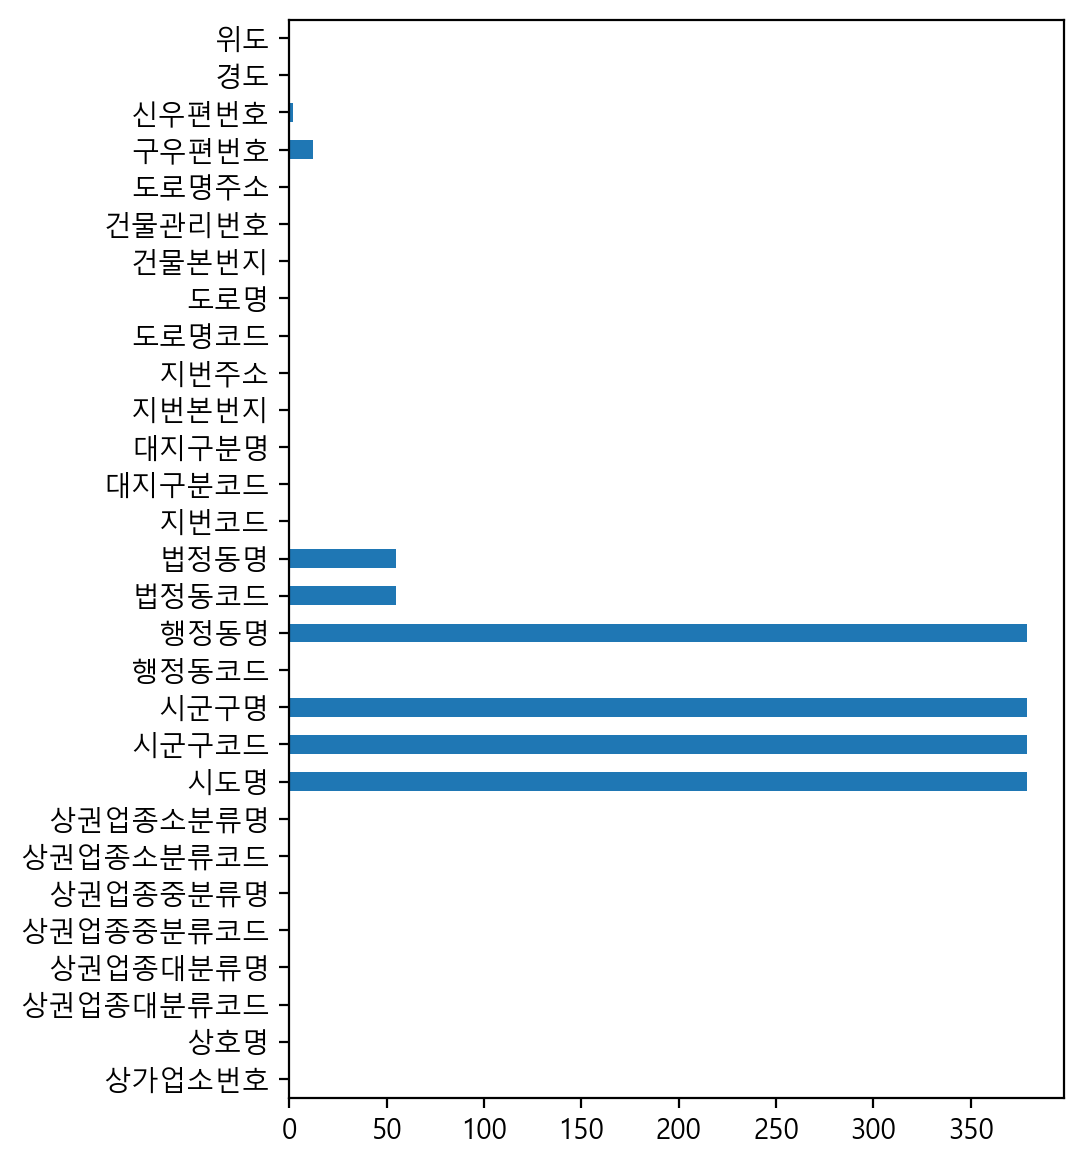

In [608]:
# 결측치 막대 그래프
# figsize : 그래프 사이즈 설정
null_count.plot.barh(figsize=(5, 7))

# 기본값: null_count.plot.line()
# x, y축 변경: null_count.plot.barh()

In [611]:
# 데이터 프레임 형태로 변환
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,상권업종대분류코드,0
3,상권업종대분류명,0
4,상권업종중분류코드,0


### 1.7 컬럼명 변경

In [113]:
# 컬럼명 조회
df_null_count.columns

Index(['컬럼명', '결측치수'], dtype='object')

In [ ]:
# 변경
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count

### 1.8 정렬하기

In [ ]:
# 결측치 순 내림차순(역순) 정렬
# + 상위 10개 출력 : head(10)
df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)
df_null_count_top

### 1.9 특정 컬럼만 불러오기

In [ ]:
# NaN : Not a Number, 결측치

df["지점명"]

In [573]:
# 결측치가 많은 top 10를
# list 형태로 변경
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [ ]:
df[drop_columns].head()

### 1.10 제거하기

In [158]:
# axis (0: 행 row ㅡ, 1: 열 column ㅣ)
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


In [ ]:
df.info()

### 1.11 기초 통계값 보기

#### 1.11.1 기초 통계 수치

In [174]:
# 평균값
df["위도"].mean()

36.62471119236065

In [180]:
# 중앙값
df["위도"].median()

37.23465232

In [182]:
# 최대값
df["위도"].max()

38.49965857

In [189]:
# 최솟값
df["위도"].min()

33.21928967

In [193]:
# 갯수
df["위도"].count()

91335

#### 1.11.2 기초통계값 요약하기 - describe
* 수치형 데이터 요약
* 데이터의 갯수 / 평균 / 표준편차 / 최솟값 / 1사분위수(25%), 2사분위수(50%) = 중앙값, 3사분위수(75%) / 최댓값

In [198]:
# 1개의 컬럼 요약 - Series 형태(1차원)로 출력됨
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [203]:
# 2개의 컬럼 요약 - DataFrame형태 (2차원)로 출력됨
df[["위도", "경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084551
75%,37.507463,128.108919
max,38.499659,130.909912


In [ ]:
# 문자열 데이터타입 요약
df.describe(include="object")

# df.describe(include="number") : 수치형 데이터타입 요약
# df.describe(include="all")

# freq: frequency 빈도수

#### 1.11.3 중복 제거한 값 보기 - unique/nunique

In [231]:
# 중복 제거
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [233]:
# 중복제거 갯수 세기
df["상권업종대분류명"].nunique()

1

In [235]:
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [237]:
df["상권업종중분류명"].nunique()

5

In [ ]:
df["상권업종소분류명"].unique()

In [ ]:
df["상권업종소분류명"].nunique()

In [ ]:
# nunique 대신 unique + len 가능
len(df["상권업종소분류명"].unique())

#### 1.11.4 그룹화된 요약값 보기 - value_counts

In [ ]:
df["시도명"].head()

In [602]:
city = df["시도명"].value_counts()
city

시도명
경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: count, dtype: int64

In [ ]:
# 비율 구하기 : normalize
city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize

In [ ]:
# 시도명 수 막대그래프
city.plot.barh()

In [ ]:
# 시도명 비율 원그래프
city_normalize.plot.pie(figsize=(7, 7))

In [ ]:
# seaborn의 countplot으로 그래프 그리기
c = sns.countplot(data=df, y="시도명")

In [288]:
df["상권업종대분류명"].value_counts()

상권업종대분류명
의료    91335
Name: count, dtype: int64

In [ ]:
mid_vc = df["상권업종중분류명"].value_counts()
mid_vc

In [ ]:
mid_vc_n = df["상권업종중분류명"].value_counts(normalize=True)
mid_vc_n

In [ ]:
sm_vc = df["상권업종소분류명"].value_counts()
sm_vc

In [ ]:
# rot : X축 라벨의 회전(rotation) 각도
mid_vc.plot.bar(rot=0)

In [ ]:
mid_vc_n.plot.pie()

In [ ]:
# grid : 격자 표시
sm_vc.plot.barh(figsize=(7, 8), grid=True)

### 1.12 데이터 색인하기

In [ ]:
# "상권업종중분류명"이 "약국/한약방"
# 색인한 값을 copy해주면 df_medical값이 바뀌더라도 원본에는 영향 X
df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head()

In [579]:
# "상권업종대분류명"이 "의료" 중 "상권업종중분류명"만 가져옴
# df.loc : 행, 열 함께 가져오기

df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()
# df.loc[df["상권업종대분류명"] == "의료"]["상권업종중분류명"]

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [581]:
# "상권업종중분류명"이 "유사의료업"인
# shape: 행,열 출력
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi.shape

(3774, 29)

In [362]:
# 상호명의 갯수 상위 10개 출력
df["상호명"].value_counts().head(10)

상호명
리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: count, dtype: int64

In [374]:
df_medi["상호명"].value_counts().head(10)

상호명
리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: count, dtype: int64

#### 1.12.1 여러 조건으로 색인하기

In [ ]:
# "상권업종중분류명"이 "약국"이고
# "시도명"이 "서울특별시"인 데이터 가져오기
# and == & / or == \

df["상권업종소분류명"] == "약국"
df["시도명"] == "서울특별시"
# Jupyter Notebook은 맨 아랫줄의 결과만 출력되기 때문에 서울특별시 데이터만 나옴

In [ ]:
df_seoul_drug = df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")]

print(df_seoul_drug.shape)
df_seoul_drug.head(1)

#### 1.12.2 구별로 보기

In [391]:
# 위 조건에 만족하는 "시군구명"의 갯수 출력
c = df_seoul_drug["시군구명"].value_counts()
c.head()

시군구명
강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: count, dtype: int64

In [604]:
# normalize: 비율
n = df_seoul_drug["시군구명"].value_counts(normalize=True)
n.head()

시군구명
강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: proportion, dtype: float64

In [ ]:
c.plot.bar(rot=60)

In [ ]:
df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"] == "서울특별시")].copy()
df_seoul_hospital

In [ ]:
df_seoul_hospital["시군구명"].value_counts()

#### 1.12.3 텍스트 데이터 색인하기

In [ ]:
# "상호명"에 "종합병원"를 포함하지 않는 데이터
# ~ : not, 아닌
# df_seoul_hospital[~df_seoul_hospital["상호명"].str.contains("종합병원")]

# 상호명만 출력 (loc[data, ""])
# unique: 중복 제거 값
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"].unique()

In [ ]:
# "상호명"에 "꽃배달"을 포함하는 데이터
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

In [ ]:
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의료기")]

In [462]:
# 종합병원과 무관한 "꽃배달|의료기|장례식장|상담소|어린이집"을 포함하는 데이터를 찾아
# index 뽑아와 list형태로 변환

drop_row = df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index
drop_row = drop_row.tolist()
drop_row

[]

In [464]:
# 삭제가 필요한 추가 데이터 담기
# "상호명"에 "의원"을 포함하는 데이터
drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()
drop_row2

[]

In [466]:
drop_row = drop_row + drop_row2
len(drop_row)

0

In [468]:
# 삭제
# axis = 0 행 기준 삭제
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0)
print(df_seoul_hospital.shape)

(58, 29)
(58, 29)


In [ ]:
# 막대 그래프 출력
df_seoul_hospital["시군구명"].value_counts().plot.bar()

In [ ]:
# seaborn 차트 출력
# order: 시군구명 값이 큰 순서대로 출력
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul_hospital, x="시군구명", 
              order=df_seoul_hospital["시군구명"].value_counts().index)

In [ ]:
df_seoul_hospital["상호명"].unique()

#### 1.12.4 특정 지역만 보기

In [494]:
# "시도명"이 "서울"인 데이터
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 29)

In [ ]:
# 서울에 있는 시군구명 막대그래프로 시각화
# figsize: 그래프 크기, rot = 글자 기울기
df_seoul["시군구명"].value_counts().plot.bar(figsize=(10, 4), rot=30)

In [ ]:
# 서울에 있는 시군구명 seaborn의 countplot으로 시각화
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul, x="시군구명")

In [ ]:
# 경도와 위도 표시 : plot.scatter
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(x="경도", y="위도", figsize=(8, 7), grid=True)

In [ ]:
# 구 별 경도와 위도
# hue : 컬럼값에 따라 색상을 다르게 표시
plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="시군구명")

In [ ]:
# 상권업종중분류명 별 경도와 위도
plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="상권업종중분류명")

In [ ]:
# 전국 데이터 시도명 별 경도와 위도
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df, x="경도", y="위도", hue="시도명")

## 1.13 Folium으로 지도 활용

* 지도 시각화를 위한 라이브러리
* Anaconda Prompt에서 아래 명령어 입력하기 folium 설치 (중간 y입력)
* conda install -c conda-forge folium

In [545]:
import folium

In [ ]:
folium.Map()

In [563]:
# 지도 중심 지정하기
# 서울 병원 위도와 경도의 평균 구하기
Latitude = df_seoul_hospital["위도"].mean()
Longitude = df_seoul_hospital["경도"].mean()

print(Latitude, Longitude)

37.52972276310344 126.9963589362069


In [ ]:
df_seoul_hospital.head()

In [ ]:
df_seoul_hospital.tail()

In [567]:
# zoom_start : zoom-in 자세히 표현
map = folium.Map(location=[Latitude, Longitude], zoom_start=12)

for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    popup =f"{name}-{address}"
    location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map